In [2]:
import sys
sys.path.append("..")

from generators.random_forest_generator import RFGenerator
from generators.p4_code_generator import P4CodeGenerator

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os, glob

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import minmax_scale
from sklearn.utils import shuffle
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
from sklearn.tree import _tree

In [9]:
# parameters
flow_length = 7
relevant_features_num = 20
evaluated_index = 4

feature_compatible_serialiazation_path = "../../outputs/serialization/feature_compatible_serialized.pkl"
feature_list_path = "../../dataset/features_with_id.csv"
dataset_path = f"../../dataset/balanced/balanced_equal_{flow_length}/relevant_balanced_equal_{flow_length}_merged_f_{relevant_features_num}.csv"


root_path = f"../../outputs/evaluation/balanced/equal_{flow_length}_{evaluated_index}/"

rf_serialization_path = root_path +  f"rf_balanced_equal_{flow_length}_n_estimators_3_max_depth_5_seralized.pkl"
feature_relevant_serialiazation_path = root_path + f"feature_relevant_balanced_equal_{flow_length}_f_{relevant_features_num}_serialized.pkl"
p4_code_path = root_path + "p4_code/"
tree_fig_path = root_path

In [10]:
############################################## generate P4 code ##############################################
# get the compatible features from pkl
with open(feature_compatible_serialiazation_path, "rb") as f:
    features_compatible = pickle.load(f)

# get relevant features from pkl
with open(feature_relevant_serialiazation_path, "rb") as f:
    features_relevant = pickle.load(f)

# get rf estimator from pkl
with open(rf_serialization_path, "rb") as f:
    rf = pickle.load(f)

p4_gen = P4CodeGenerator(rf_estimator=rf, 
                         full_features=features_compatible, 
                         relevant_features=features_relevant, 
                         save_path=p4_code_path, 
                         features_path=feature_list_path)
    
p4_gen.generate_p4_rules(packets_count=7)
# p4_gen.generate_bitstring_to_struct_action()
p4_gen.generate_compare_feature_action()
# p4_gen.generate_mathch_action_tables()
# p4_gen.generate_classfication_logic()

P4 code generator
Generated P4 rules.
Generated compare feature action code


size of dataset: 220294
Start building Random Forest


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.99      0.95    110147
           1       0.99      0.91      0.95    110147

    accuracy                           0.95    220294
   macro avg       0.96      0.95      0.95    220294
weighted avg       0.96      0.95      0.95    220294



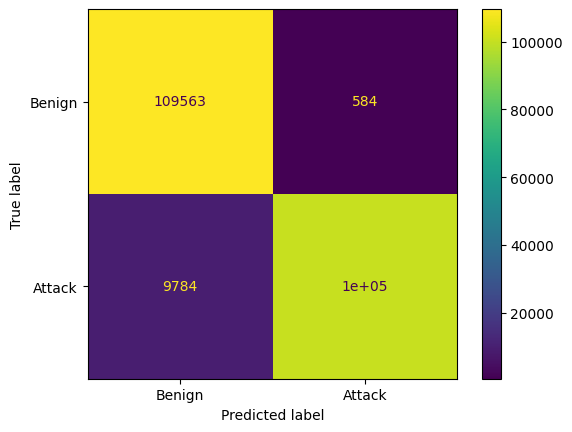

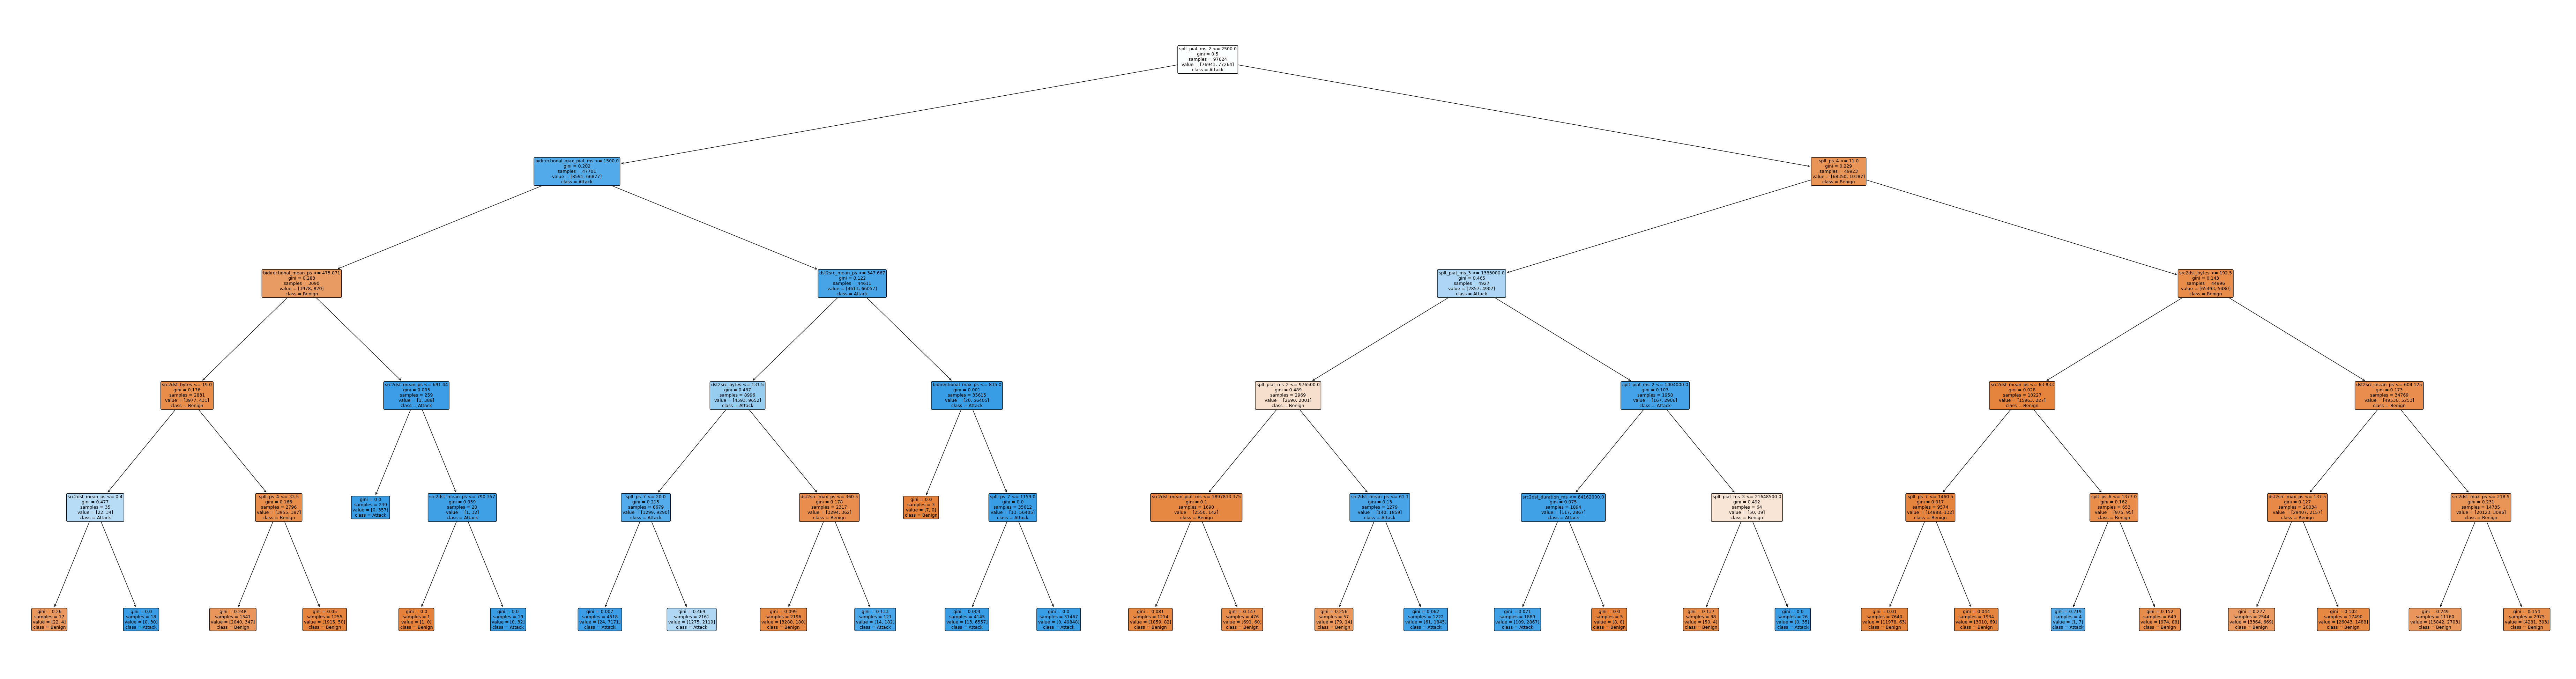

In [11]:
############################################## evaluation ##############################################
# read the dataset
df = pd.read_csv(dataset_path)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(f"size of dataset: {len(y)}")

# get rf estimator from pkl
with open(rf_serialization_path, "rb") as f:
    rf = pickle.load(f)

rf_gen = RFGenerator()

plot_confusion_matrix(rf, X, y, display_labels=["Benign", "Attack"])

y_predict = rf.predict(X)
print(classification_report(y, y_predict))

# plot and save the trees
rf_gen.plot_trees(save_path=tree_fig_path, 
                  rf_estimator=rf,
                  features=X.columns)

In [ ]:
# plot and save the trees
rf_gen.plot_trees(save_path=tree_fig_path, 
                  rf_estimator=rf,
                  features=X.columns)